In [342]:
###import libraries
import numpy as np
import pandas as pd
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [343]:
df = pd.read_csv("day.csv")

In [344]:
df.head(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349


In [345]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [346]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [347]:
#all the columns are non-null

In [348]:
###questions to answer
#Which variables are significant in predicting the demand for shared bikes.
#How well those variables describe the bike demands

In [349]:
#Which variables are significant in predicting the demand for shared bikes.
#Ans: If the variable has a low P(<0.05) value then its good for prediction of target variable

In [350]:
#How well those variables describe the bike demands
#And: Find out Rsquare for over all model variables,
#if it > 80 we are able to explain 80% of target variables variance

In [351]:
#treating dummy variables
season_type = pd.get_dummies(df["season"])

In [352]:
season_type.head(5)

,1,2,3,4
0,True,False,False,False
1,True,False,False,False
2,True,False,False,False
3,True,False,False,False
4,True,False,False,False


In [353]:
#lets drop the column 1, since the rest of the columns 2,3,4 give the same meaning
season_type=season_type.drop(labels=[1], axis=1)

In [354]:
season_type.head(5)

,2,3,4
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False


In [355]:
#lets name the column names with season names
season_type=season_type.rename(columns={2:"summer",3:"fall",4:"winter"})

In [356]:
season_type.head(3)

,summer,fall,winter
0,False,False,False
1,False,False,False
2,False,False,False


In [357]:
#lets drop the column "Season" from df and add the 3 dummy representatives
df=df.drop(columns=["season"], axis=1)

In [358]:
df.head(2)

,instant,dteday,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801


In [359]:
#concatenate season type and df
df=pd.concat([df, season_type], axis = 1)

In [360]:
df.head(3)

,instant,dteday,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,summer,fall,winter
0,1,01-01-2018,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,False,False,False
1,2,02-01-2018,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,False,False,False
2,3,03-01-2018,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,False,False,False


In [361]:
#making sure there are variations in the column values
df[["summer","fall","winter"]].describe()

,summer,fall,winter
count,730,730,730
unique,2,2,2
top,False,False,False
freq,546,542,552


In [362]:
###we dont have a weathersit =4 in our database, 
# so we dont be able to predict for it, so lets have only 2 cols

In [363]:
#lets create dummies for "weathersit" as well
# Let's drop the last column from status df using 'drop_first = True'
weather_type = pd.get_dummies(df['weathersit'], drop_first = True)

# rename the columns as per the data definitions
weather_type.rename(columns={2:"mist",3:"light"}, inplace=True)

# Add the results to the original housing dataframe
df = pd.concat([df, weather_type], axis = 1)

# Now let's see the head of our dataframe.
df[["mist","light"]].head(10)

,mist,light
0,True,False
1,True,False
2,False,False
3,False,False
4,False,False
5,False,False
6,True,False
7,True,False
8,False,False
9,False,False


In [364]:
df=df.drop(columns=["weathersit"])

In [365]:
df.head(5)

,instant,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,summer,fall,winter,mist,light
0,1,01-01-2018,0,1,0,1,1,14.110847,18.18125,80.5833,10.749882,331,654,985,False,False,False,True,False
1,2,02-01-2018,0,1,0,2,1,14.902598,17.68695,69.6087,16.652113,131,670,801,False,False,False,True,False
2,3,03-01-2018,0,1,0,3,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,False,False,False,False,False
3,4,04-01-2018,0,1,0,4,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,False,False,False,False,False
4,5,05-01-2018,0,1,0,5,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,False,False,False,False,False


In [366]:
#two more columns to convert into dummy 
#mnth
#weekday

In [367]:
#lets create dummies for "mnth" as well
# Let's drop the last column from status df using 'drop_first = True'
mnth_type = pd.get_dummies(df['mnth'], drop_first = True)

# rename the columns as per the data definitions
mnth_type.rename(columns={2:"feb",
                          3:"mar",
                          4:"apr",
                          5:"may",
                          6:"jun",
                          7:"jul",
                          8:"aug",
                          9:"sep",
                          10:"oct",
                          11:"nov",
                          12:"dec"}, inplace=True)

# Add the results to the original housing dataframe
df = pd.concat([df, mnth_type], axis = 1)

df.drop(columns=["mnth"], inplace=True)
# Now let's see the head of our dataframe.
df[["mar","dec"]].head(5)

,mar,dec
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False


In [368]:
#lets create dummies for "weekday" as well
# Let's drop the last column from status df using 'drop_first = True'
weekday_type = pd.get_dummies(df['weekday'], drop_first = True)

# rename the columns as per the data definitions
weekday_type.rename(columns={1:"tue",
                          2:"wed",
                          3:"thu",
                          4:"fri",
                          5:"sat",
                          6:"sun"}, inplace=True)

# Add the results to the original housing dataframe
df = pd.concat([df, weekday_type], axis = 1)

df.drop(columns=["weekday"], inplace=True)
# Now let's see the head of our dataframe.
df[["sat","sun"]].head(5)

,sat,sun
0,False,False
1,False,False
2,False,False
3,False,False
4,True,False


In [369]:
#columns we wont need
#instant-- just a sno
#dteday-- just a date
#casual-- part of target variable
#registered-- part of target variable
df.drop(columns={"dteday","instant","casual","registered"}, inplace=True)

In [370]:
#final df after data modification
df.head(5)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,...,sep,oct,nov,dec,tue,wed,thu,fri,sat,sun
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,False,False,...,False,False,False,False,True,False,False,False,False,False
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,False,False,...,False,False,False,False,False,True,False,False,False,False
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,False,False,...,False,False,False,False,False,False,True,False,False,False
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,False,False,...,False,False,False,False,False,False,False,True,False,False
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,False,False,...,False,False,False,False,False,False,False,False,True,False


In [371]:
#---------------------------------------
#lets do a pair plot to see the relation
import seaborn as sns
sns.pairplot(df)

<Axes: >

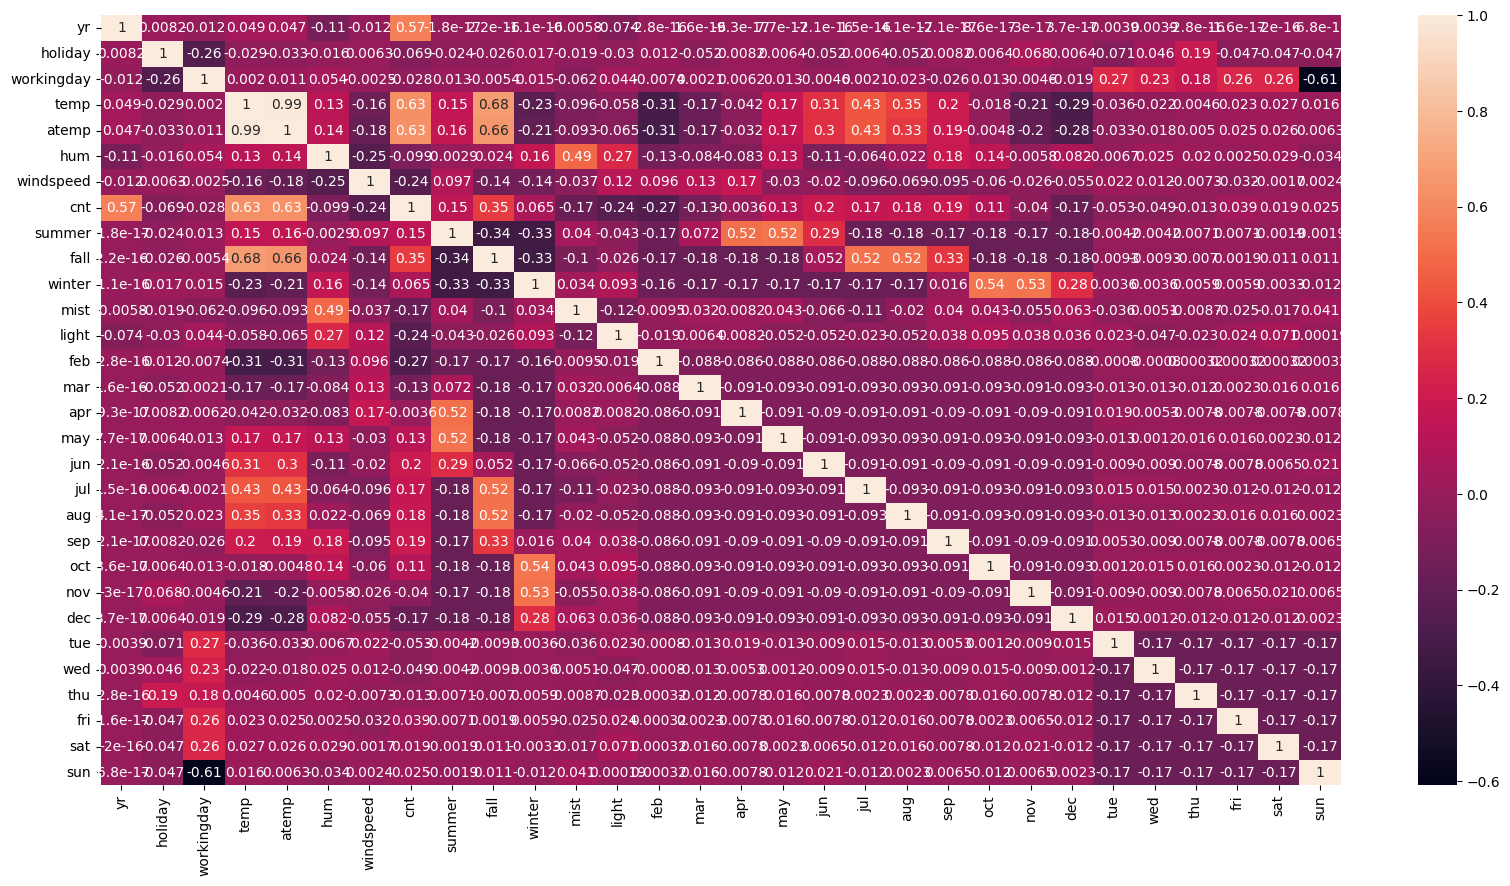

In [372]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df.corr(),annot = True)

In [373]:
#lets start to build the model
#1. make train test split
#2. train a model and find summary of model parms
#3. observe and comment on the outcomes
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df,  train_size = 0.7, test_size = 0.3, random_state = 100)

In [374]:
#lets scale the variables for better fitting
#test wont be touched
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,...,sep,oct,nov,dec,tue,wed,thu,fri,sat,sun
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,False,False,...,False,True,False,False,False,False,True,False,False,False
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,False,True,...,False,False,False,False,False,False,True,False,False,False
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,False,False,...,False,False,False,False,False,False,False,False,False,False
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,False,False,...,False,False,False,True,True,False,False,False,False,False
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,True,False,...,False,False,False,False,False,False,False,False,False,False


In [375]:
#split data to target and variables
y_train = df_train.pop('cnt')
X_train = df_train

In [376]:
#lets build model now
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)


LinearRegression()

In [377]:
np.asarray(y_train)

array([0.86424298, 0.82765762, 0.46525541, 0.20409572, 0.48297285,
       0.19109526, 0.78255867, 0.85158767, 0.71030833, 0.49988495,
       0.69247584, 0.98170732, 0.47491947, 0.73791993, 0.54130235,
       0.88564197, 0.52082375, 0.66532444, 0.71479521, 0.51058445,
       0.59468477, 0.64565117, 0.80947998, 0.6026231 , 0.34871146,
       0.78267372, 0.47181316, 0.79889554, 0.83617119, 0.52554073,
       0.39127934, 0.57742752, 0.38541187, 0.51645191, 0.5716751 ,
       0.57386102, 0.16946618, 0.50080534, 0.77795674, 0.66589968,
       0.61585366, 0.46882191, 0.26138978, 0.13598711, 0.62149103,
       0.53117809, 0.73032674, 0.78324896, 0.71870686, 0.84272895,
       0.53060285, 0.80349747, 0.4723884 , 0.50368155, 0.67280258,
       0.61205706, 0.76725725, 0.5961804 , 0.55430281, 0.76127474,
       0.36136677, 0.46537046, 0.63851818, 0.30349747, 0.63034975,
       0.71111367, 0.58271974, 0.47526461, 0.33260469, 0.69132536,
       0.6916705 , 0.42625403, 0.90232398, 0.13173033, 0.58858

In [378]:
np.asarray(X_train)

array([[1, 0, 1, ..., False, False, False],
       [1, 0, 1, ..., False, False, False],
       [1, 0, 0, ..., False, False, False],
       ...,
       [0, 0, 1, ..., False, True, False],
       [0, 0, 1, ..., False, False, False],
       [0, 0, 1, ..., False, False, False]], dtype=object)

In [379]:
X_train=X_train.astype(float)

In [380]:
# train using stats model
# Adding a constant variable 
import statsmodels.api as sm  
X_train = sm.add_constant(X_train)
lm = sm.OLS(y_train,X_train).fit()   # Running the linear model

In [381]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     94.48
Date:                Fri, 01 Nov 2024   Prob (F-statistic):          4.09e-178
Time:                        17:27:26   Log-Likelihood:                 523.87
No. Observations:                 510   AIC:                            -987.7
Df Residuals:                     480   BIC:                            -860.7
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2369      0.030      7.841      0.0

In [382]:
# Which variables are significant in predicting the demand for shared bikes.
# insignificant ones are = atemp, workingday, fall-season
# most significant ones are=
# const
# yr
# holiday
# temp
# hum
# windspeed
# summer
# winter
# mist
# light
# mar
# oct

In [383]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,temp,67.04
3,workingday,66.33
0,const,58.39
5,atemp,55.88
24,tue,42.92
25,wed,42.04
28,sat,41.09
27,fri,40.36
26,thu,37.42
9,fall,11.38


In [384]:
# How well those variables describe the bike demands
# the best ones are with vif<5
# yr, light-snow-weather, windspeed, mist-weather, sunday, february month, humidity, march-month,dec mont

In [385]:
#residual analysis on train
y_train_preditced = lm.predict(X_train)

In [386]:
from sklearn.metrics import r2_score
r2_score(y_train_preditced, y_train)

0.824820268643812

Text(0.5, 0, 'Errors')

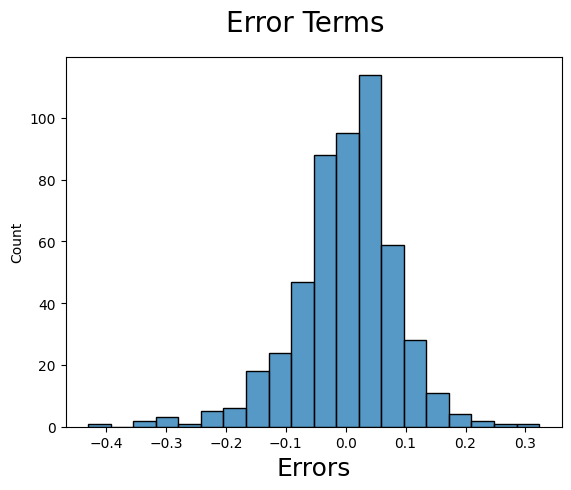

In [387]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Plot the histogram of the error terms
fig = plt.figure()
sns.histplot((y_train - y_train_preditced), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)    

In [388]:
#the errors show a normal distribution curve which is good!

#lets predict and check on test set.


In [389]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [390]:
y_test = df_test.pop('cnt')
X_test = df_test

In [391]:
# Now let's use our model to make predictions.

X_test=sm.add_constant(X_test)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train.columns]


In [392]:
# Making predictions
y_pred = lm.predict(X_test_new)

Text(0, 0.5, 'y_pred')

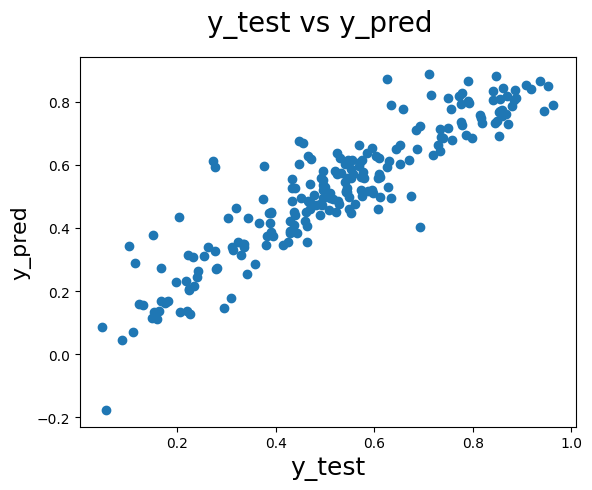

In [393]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

In [394]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8292872865932331